# Initiation

In [1]:
%load_ext autoreload
%autoreload 2

import os
import shutil
import random
import pprint

import pysam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/users/pjh/scripts/python_genome_packages')

In [2]:
from handygenome.common import ChromDict, Vcfspec, Interval
from handygenome.variantplus.breakends import Breakends
from handygenome.variantplus.variantplus import VariantPlus
from handygenome.variantplus.vcfplus import VcfPlus
from handygenome import igvhandle

In [3]:
FASTA_PATH_HG19 = "/home/users/data/01_reference/human_g1k_v37/human_g1k_v37.fasta"
FASTA_PATH_HG38 = "/home/users/data/01_reference/human_g1k_v38/Homo_sapiens_assembly38.fasta"

FASTA_HG19 = pysam.FastaFile(FASTA_PATH_HG19)
FASTA_HG38 = pysam.FastaFile(FASTA_PATH_HG38)
CHROMDICT_HG19 = ChromDict(fasta_path=FASTA_PATH_HG19)
CHROMDICT_HG38 = ChromDict(fasta_path=FASTA_PATH_HG38)

In [4]:
igv = igvhandle.IGVHandle(60387)

In [5]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        ts1 = time.perf_counter()
        result = func(*args, **kwargs)
        ts2 = time.perf_counter()
        print(f'elapsed time: {ts2 - ts1}')
        return result
    return wrapper

# Interactive SigProfiler

In [66]:
from handygenome.signature.sigprofiler import get_catalogues
from handygenome.signature.sigprofiler import run_assignment
from handygenome.signature.misc import load_signature_data
from handygenome.signature.signatureresult import get_sigresult_from_vcfpath

In [67]:
vcf_path = '/home/users/pjh/practice/pipeline_test/handygenome/sigprofiler/FF13.Mutect2.processed.vcf'

In [68]:
sigresult = get_sigresult_from_vcfpath(vcf_path, 'GRCh37')

[KST 2022-06-23 16:32:11 INFO] handygenome.signature.signatureresult: Creating mutation catalogue
[KST 2022-06-23 16:32:11 INFO] handygenome.signature.signatureresult: Creating mutation catalogue
[KST 2022-06-23 16:32:28 INFO] handygenome.signature.signatureresult: Running SigProfilerAssignment
[KST 2022-06-23 16:32:28 INFO] handygenome.signature.signatureresult: Running SigProfilerAssignment
[KST 2022-06-23 16:32:28 INFO] handygenome.signature.signatureresult: All finished.
[KST 2022-06-23 16:32:28 INFO] handygenome.signature.signatureresult: All finished.


In [69]:
sigresult_sigpro = get_sigresult_from_vcfpath(vcf_path, 'GRCh37', cataloguer='sigprofiler')

[KST 2022-06-23 16:32:28 INFO] handygenome.signature.signatureresult: Creating mutation catalogue
[KST 2022-06-23 16:32:28 INFO] handygenome.signature.signatureresult: Creating mutation catalogue


Starting matrix generation for SNVs and DINUCs...Completed! Elapsed time: 12.8 seconds.
Starting matrix generation for INDELs...Completed! Elapsed time: 6.84 seconds.
Matrices generated for 1 samples with 143 errors. Total of 331070 SNVs, 5131 DINUCs, and 32660 INDELs were successfully analyzed.


[KST 2022-06-23 16:32:57 INFO] handygenome.signature.signatureresult: Running SigProfilerAssignment
[KST 2022-06-23 16:32:57 INFO] handygenome.signature.signatureresult: Running SigProfilerAssignment
[KST 2022-06-23 16:32:57 INFO] handygenome.signature.signatureresult: All finished.
[KST 2022-06-23 16:32:57 INFO] handygenome.signature.signatureresult: All finished.


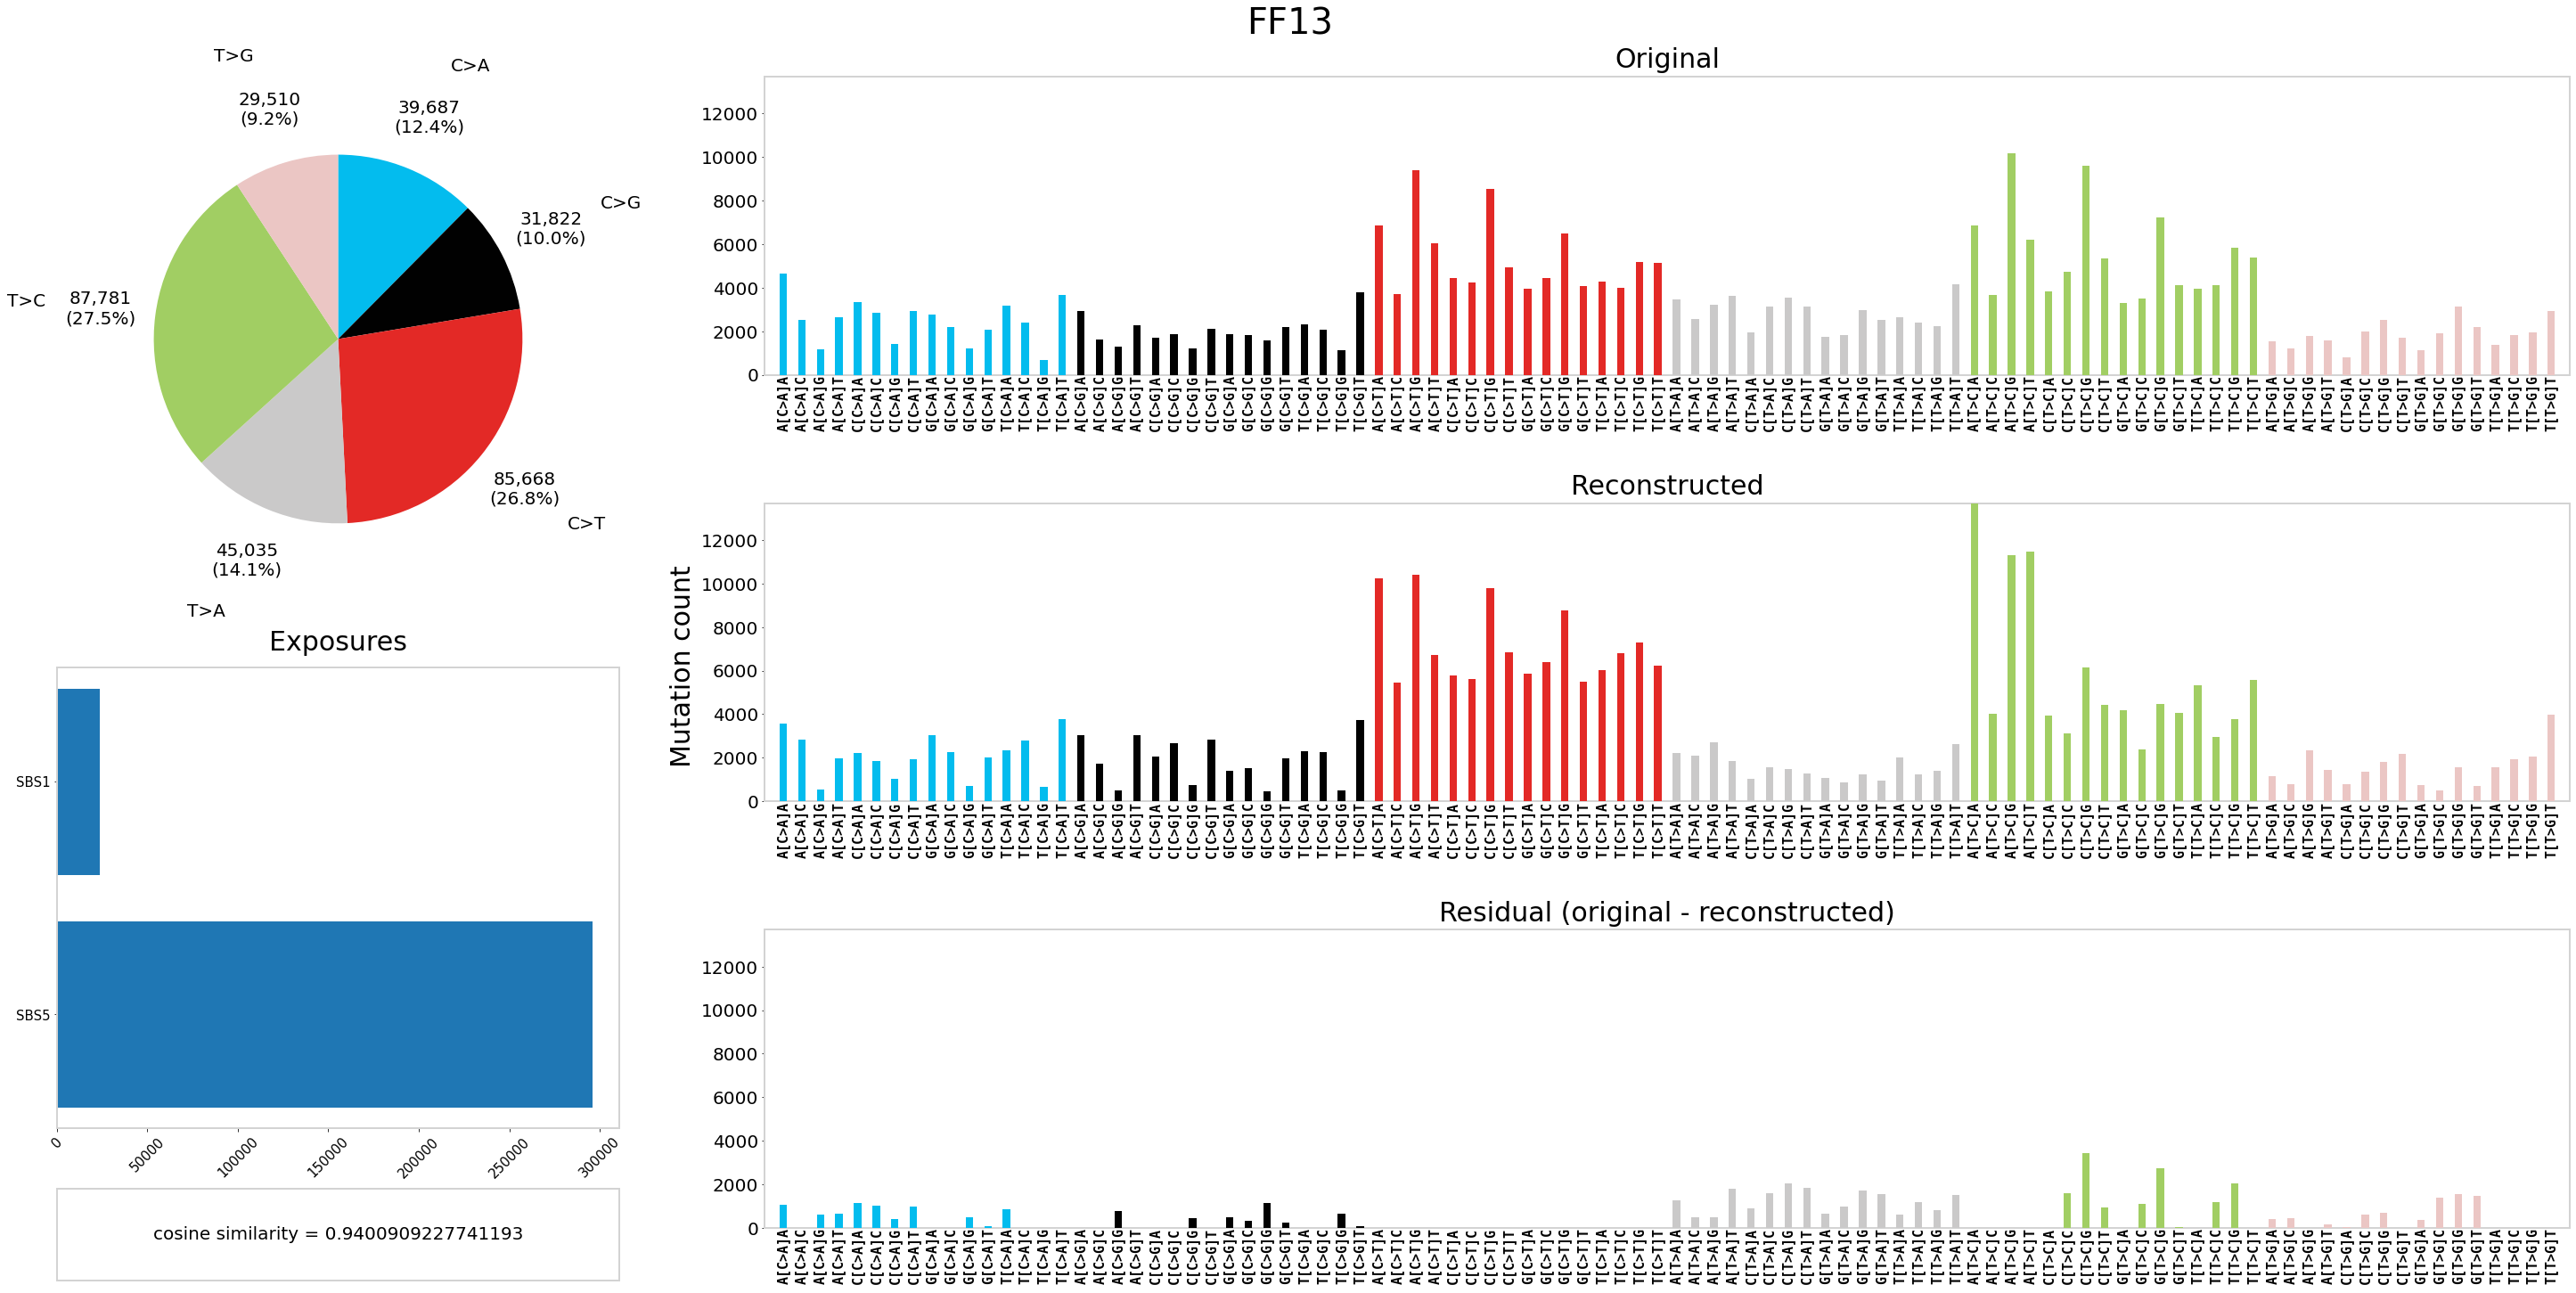

In [70]:
sigresult.plot('FF13')

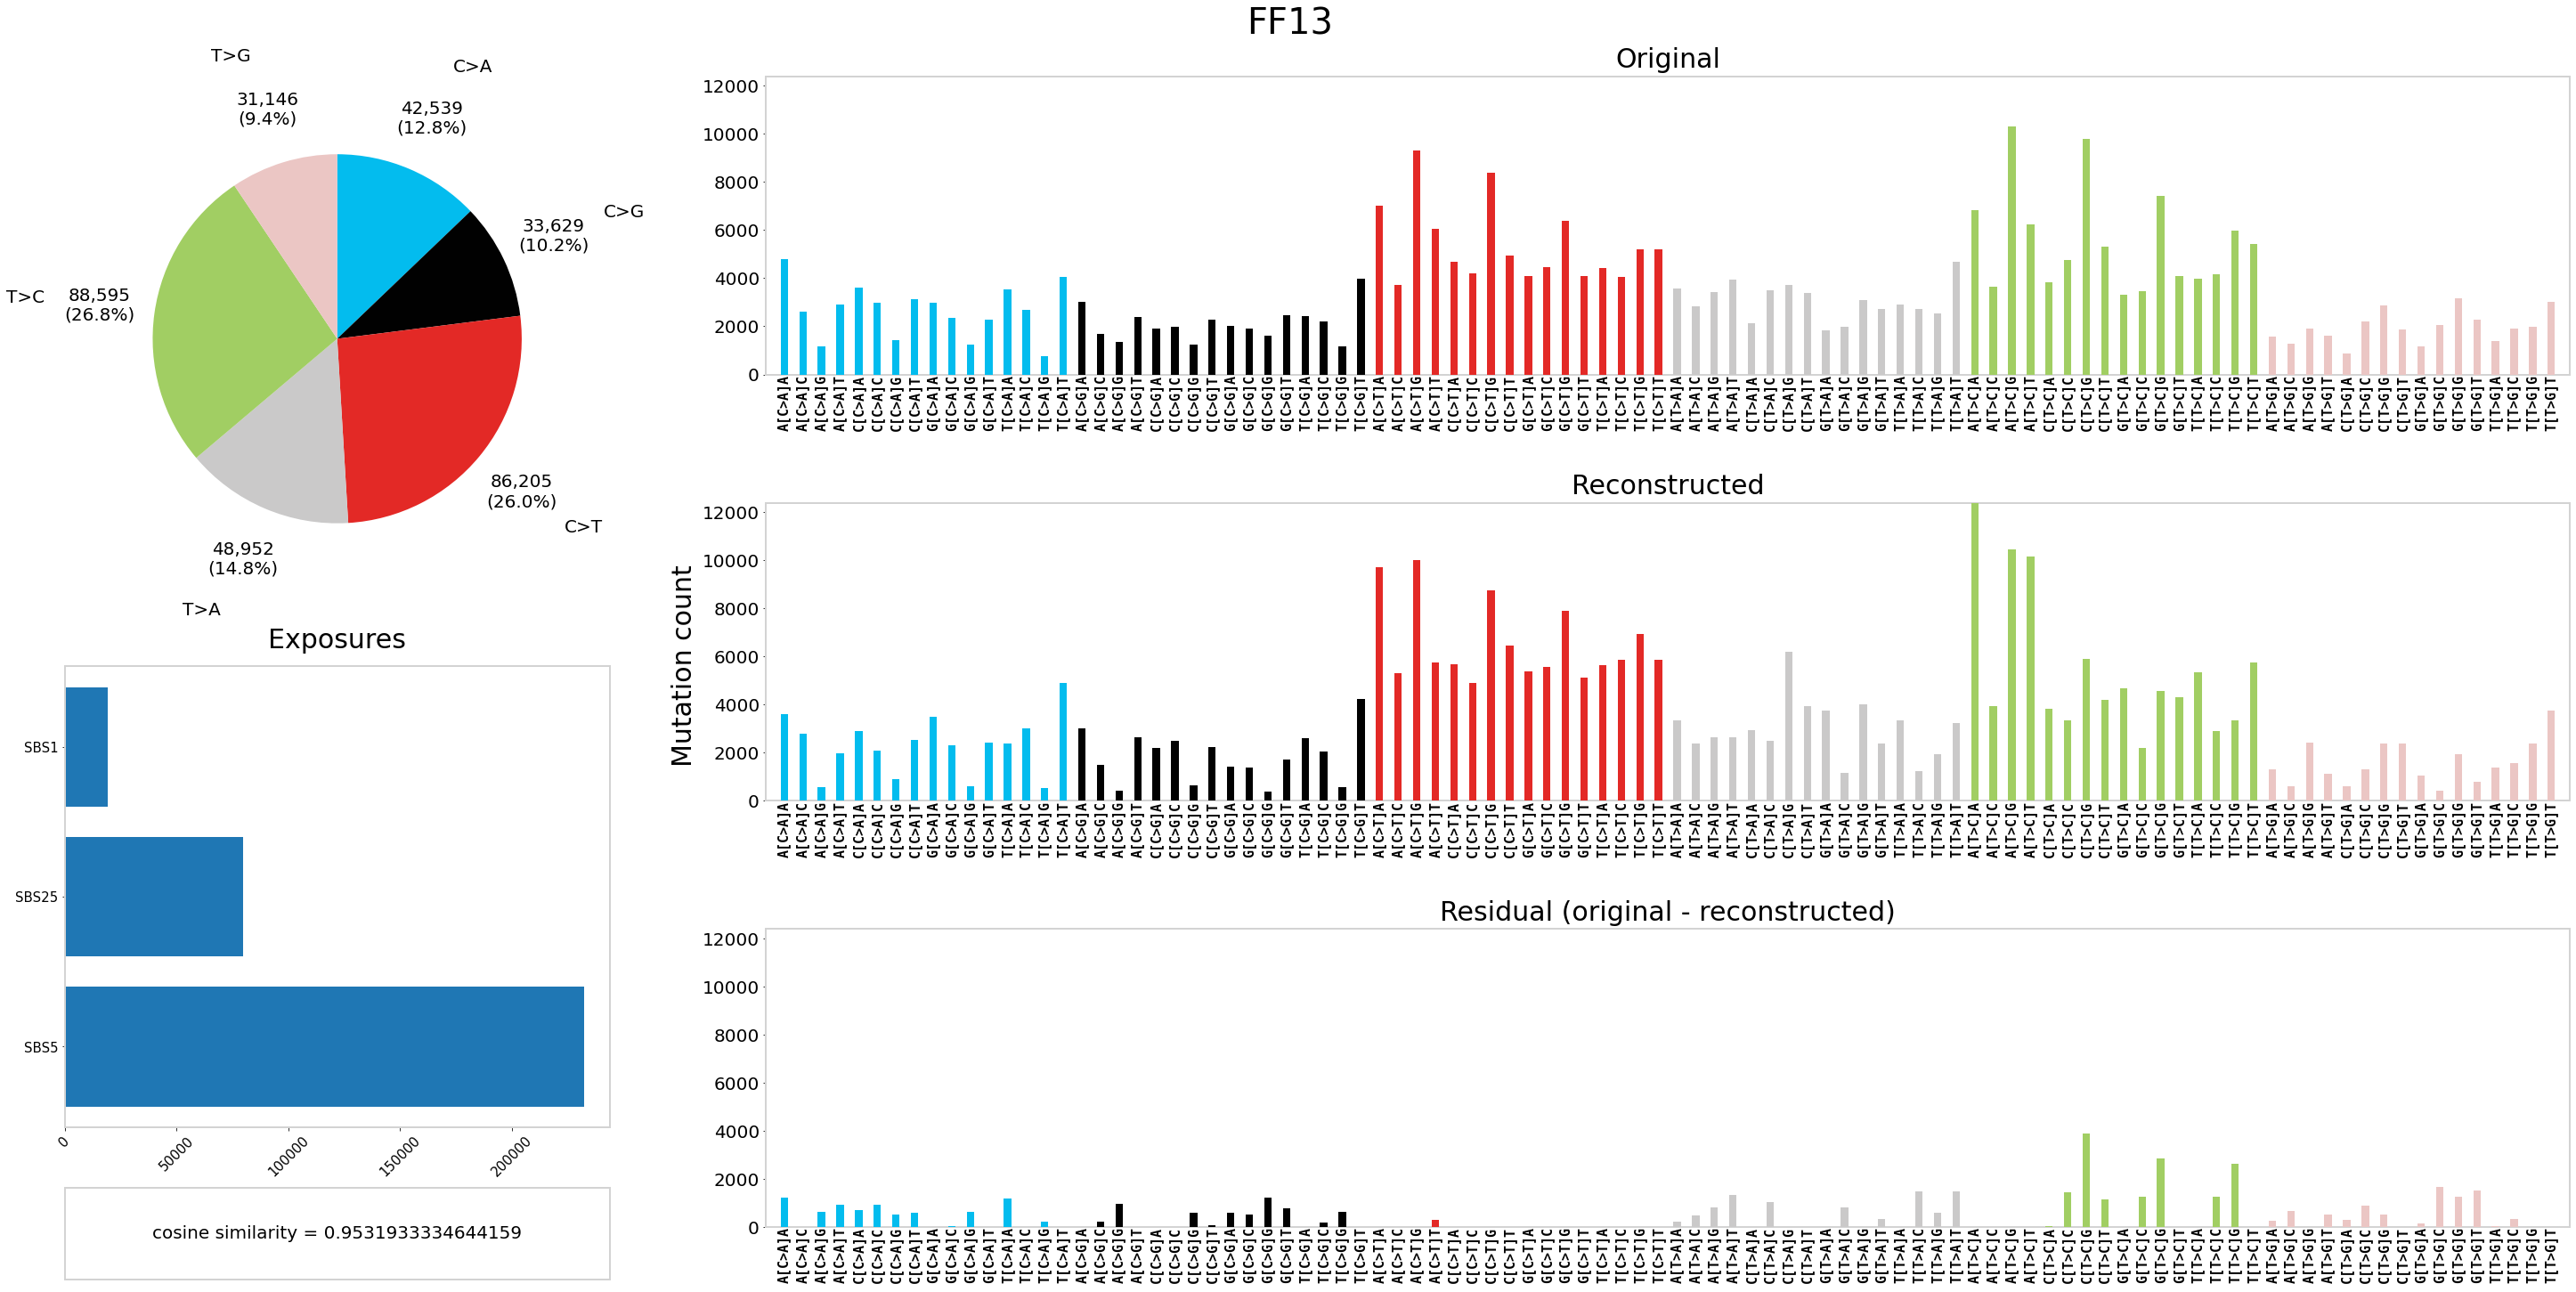

In [71]:
sigresult_sigpro.plot('FF13')

In [23]:
sigdata_sbs = load_signature_data('GRCh37', 'sbs96')

In [24]:
sigdata_sbs.index

Index(['A[C>A]A', 'A[C>A]C', 'A[C>A]G', 'A[C>A]T', 'A[C>G]A', 'A[C>G]C',
       'A[C>G]G', 'A[C>G]T', 'A[C>T]A', 'A[C>T]C', 'A[C>T]G', 'A[C>T]T',
       'A[T>A]A', 'A[T>A]C', 'A[T>A]G', 'A[T>A]T', 'A[T>C]A', 'A[T>C]C',
       'A[T>C]G', 'A[T>C]T', 'A[T>G]A', 'A[T>G]C', 'A[T>G]G', 'A[T>G]T',
       'C[C>A]A', 'C[C>A]C', 'C[C>A]G', 'C[C>A]T', 'C[C>G]A', 'C[C>G]C',
       'C[C>G]G', 'C[C>G]T', 'C[C>T]A', 'C[C>T]C', 'C[C>T]G', 'C[C>T]T',
       'C[T>A]A', 'C[T>A]C', 'C[T>A]G', 'C[T>A]T', 'C[T>C]A', 'C[T>C]C',
       'C[T>C]G', 'C[T>C]T', 'C[T>G]A', 'C[T>G]C', 'C[T>G]G', 'C[T>G]T',
       'G[C>A]A', 'G[C>A]C', 'G[C>A]G', 'G[C>A]T', 'G[C>G]A', 'G[C>G]C',
       'G[C>G]G', 'G[C>G]T', 'G[C>T]A', 'G[C>T]C', 'G[C>T]G', 'G[C>T]T',
       'G[T>A]A', 'G[T>A]C', 'G[T>A]G', 'G[T>A]T', 'G[T>C]A', 'G[T>C]C',
       'G[T>C]G', 'G[T>C]T', 'G[T>G]A', 'G[T>G]C', 'G[T>G]G', 'G[T>G]T',
       'T[C>A]A', 'T[C>A]C', 'T[C>A]G', 'T[C>A]T', 'T[C>G]A', 'T[C>G]C',
       'T[C>G]G', 'T[C>G]T', 'T[C>T]A', 'T[C>T]C', 

In [10]:
sigdata_id = load_signature_data('GRCh37', 'id83')

In [11]:

catalogues = get_catalogues(vcf_path, 'GRCh37')

Starting matrix generation for SNVs and DINUCs...Completed! Elapsed time: 27.35 seconds.
Starting matrix generation for INDELs...Completed! Elapsed time: 8.06 seconds.
Matrices generated for 1 samples with 143 errors. Total of 331070 SNVs, 5131 DINUCs, and 32660 INDELs were successfully analyzed.


In [17]:
result = run_assignment(catalogues['sbs96'], sigdata_sbs)





!!!!!!!!!!!!!!!!!!STARTING LAYER:  0



################## Add Index 1 ########################
[0 4]
[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
0.3563796544892208

################## Remove ########################
[0 4]
0.3563796544892208



################## Add Index 2 ########################
[0 2 4]
[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
0.30321764515984145

################## Remove ########################
[0 2 4]
0.30321764515984145



################## Add Index 3 ###

In [11]:
result_id = run_assignment(catalogues['id83'], sigdata_id)

Function "run_assignment": Signature name SBS1 is not included in the input signature dataset.
Function "run_assignment": Signature name SBS5 is not included in the input signature dataset.
Function "run_assignment": Signature name SBS1 is not included in the input signature dataset.
Function "run_assignment": Signature name SBS5 is not included in the input signature dataset.






!!!!!!!!!!!!!!!!!!STARTING LAYER:  0



################## Add Index 0 ########################
[0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
0.991038797139366

################## Remove ########################
[0]
0.991038797139366



################## Add Index 1 ########################
[1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
0.9776052773354736

################## Remove ########################
[1]
0.9776052773354736



################## Add Index 2 ########################
[2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
0.9534468582529968

################## Remove ########################
[2]
0.9534468582529968



################## Add Index 3 ########################
[3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
0.9792806879674806

################## Remove ########################
[3]
0.9792806879674806



################## Add Index 4 ########################
[4]
[0, 1, 2, 3, 4, 5,

In [50]:
exposure = result[1]

In [225]:
exposure

array([ 19203.,      0.,      0.,      0., 232106.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,  79761.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.])

In [72]:
result

([0, 4, 31],
 array([ 19203.,      0.,      0.,      0., 232106.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,  79761.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.]),
 0.3023614873480011,
 0.9531933334644159,
 0.062,
 0.86)

In [73]:
cossim = result[3]

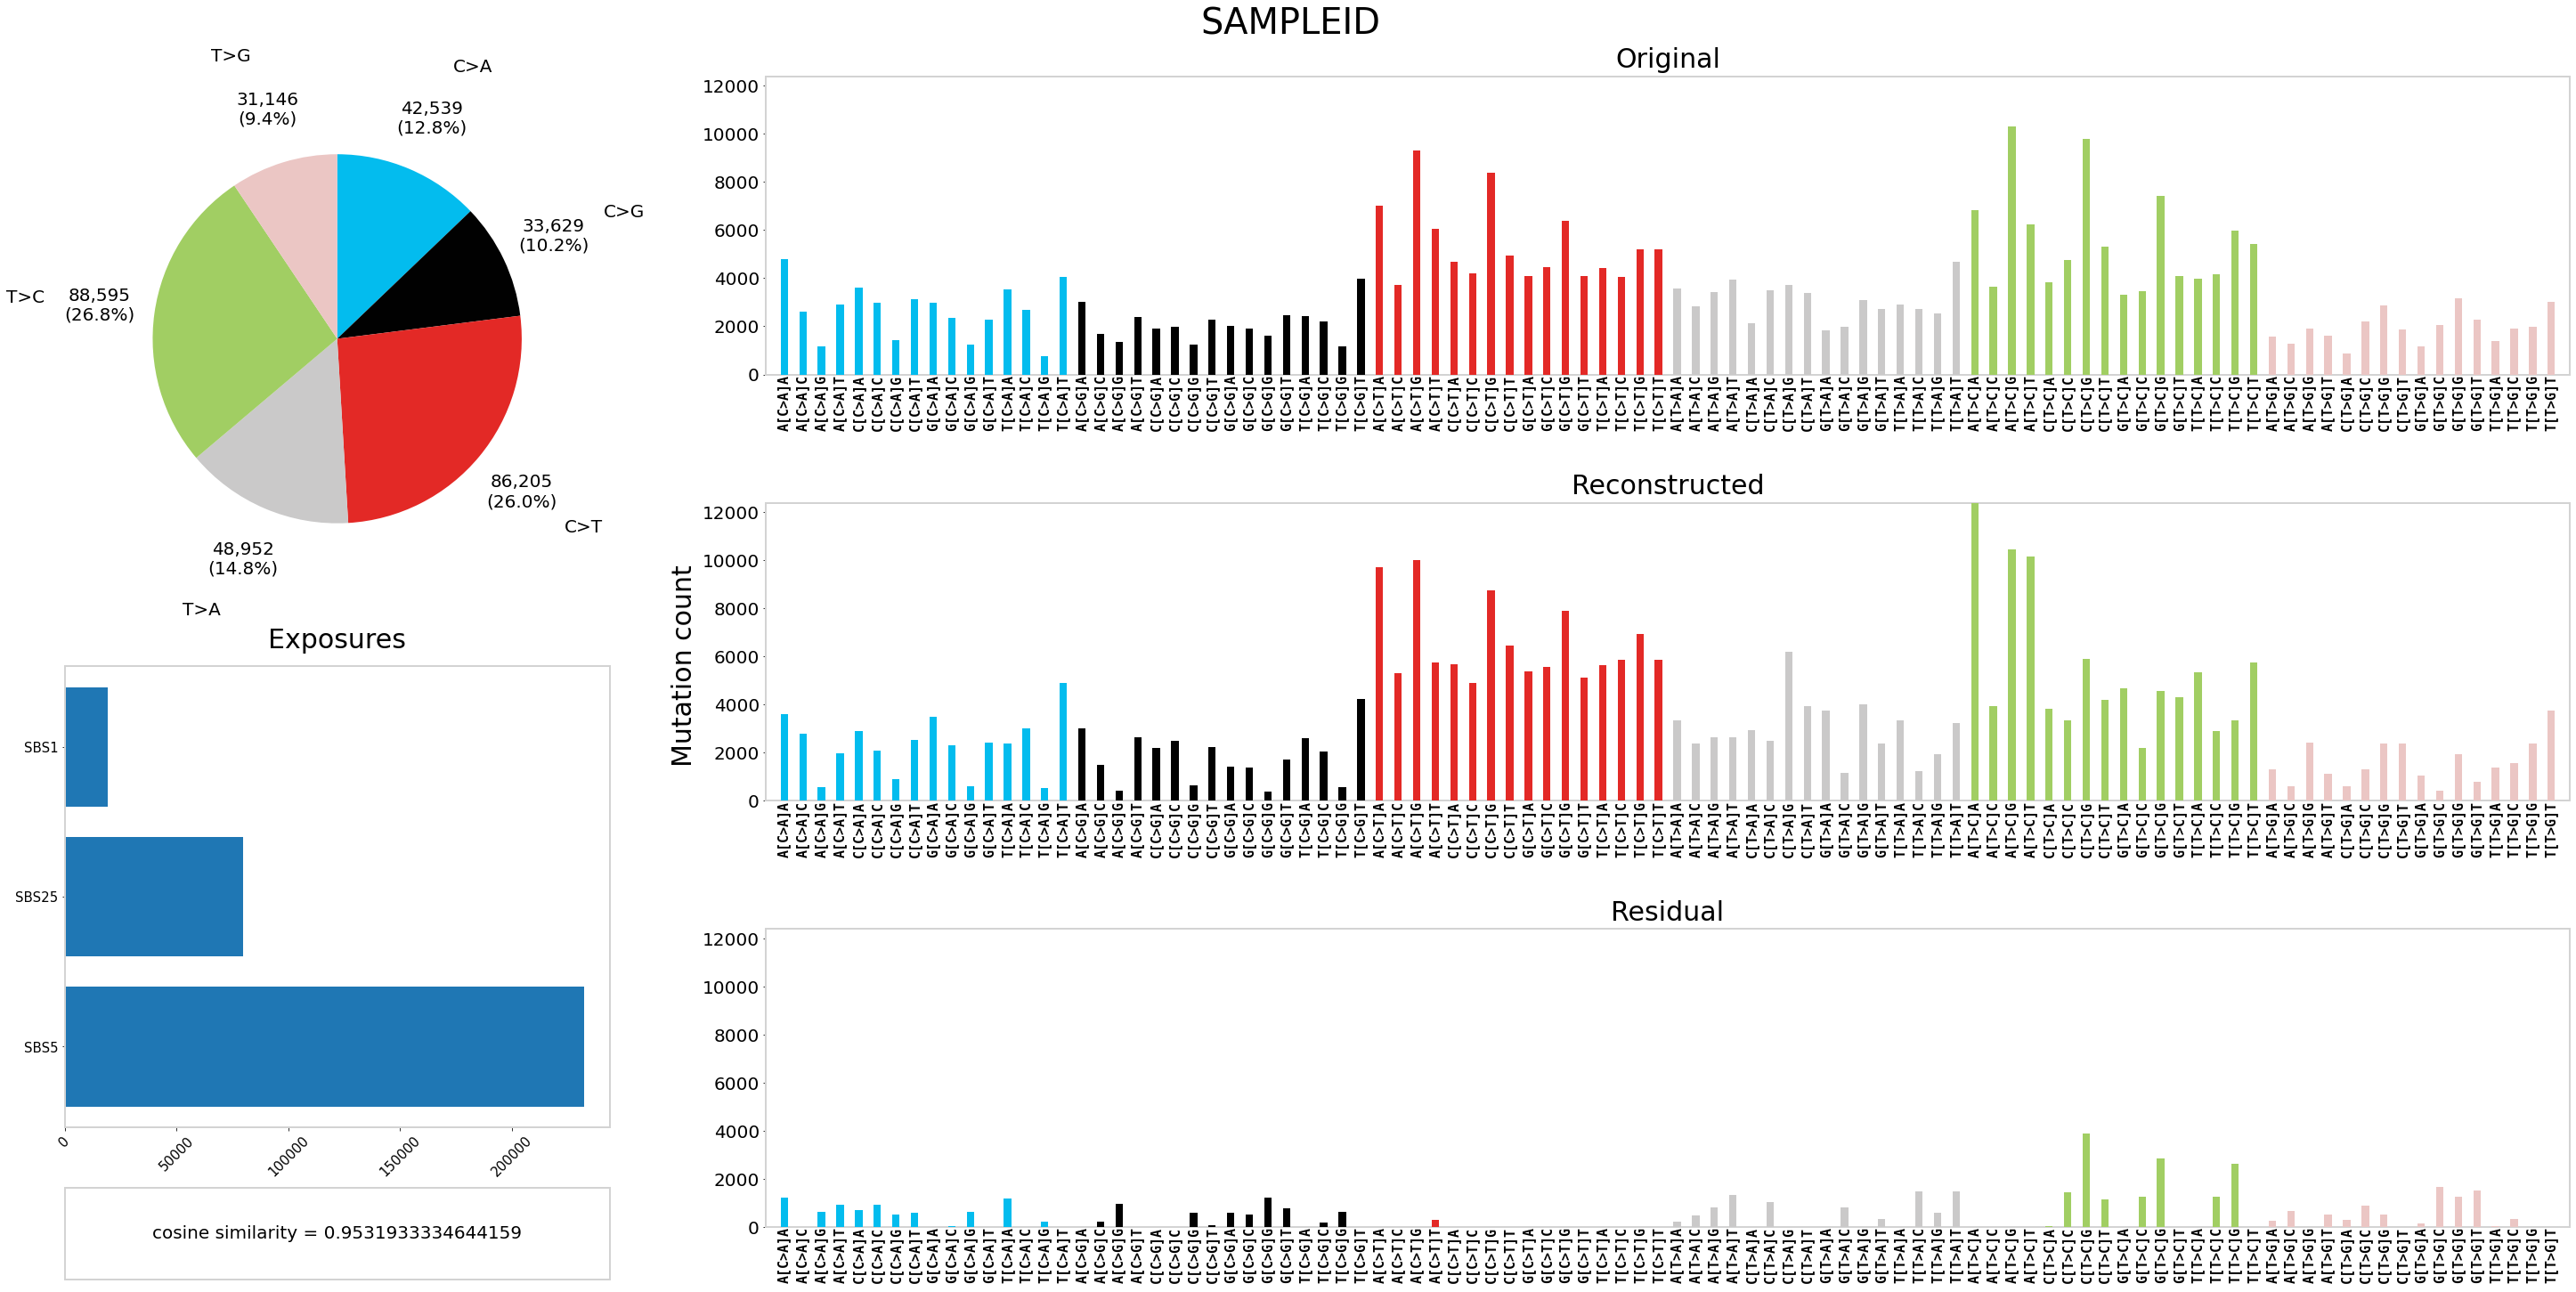

In [79]:
%matplotlib inline

def get_sbs96_keys():
    result = list()
    for ref in 'CT':
        alts = sorted(set('ACGT') - set(ref))
        for alt in alts:
            for pre in 'ACGT':
                for post in 'ACGT':
                    result.append((pre, ref, alt, post))
    return result

def get_sbs6_keys():
    result = list()
    for ref in 'CT':
        alts = sorted(set('ACGT') - set(ref))
        for alt in alts:
            result.append(f'{ref}>{alt}')
    return result

def draw_bars_sbs(ax, catalogue_dict, title, ylim, add_cat_labels=True):
    ax.tick_params('x', bottom=False, labelbottom=False)
    ax.tick_params('y', labelsize=20)
    ax.set_title(title, size=30, pad=10)
#     ax.set_ylabel('Mutation count', size=30)
    ax.set_xlim(-1, 96)
    ax.set_ylim(*ylim)

    for idx, xlabel_tuple in enumerate(CATALOGUE_KEYS_SBS96):
        pre, ref, alt, post = xlabel_tuple
        catalogue_key = f'{pre}[{ref}>{alt}]{post}'
        label = f'{pre}[{ref}>{alt}]{post}'

        x = idx
        y = catalogue_dict[catalogue_key]
        color = COLORS_SBS6[f'{ref}>{alt}']
        ax.bar(x, y, color=color, align='center', width=0.4, zorder=1000)
        if add_cat_labels:
            ax.text(x, 0, label, size=15, rotation='vertical', horizontalalignment='center', verticalalignment='top', family='monospace', weight='bold')
            
def draw_bars_exposure(ax, exposure_dict):
    exposure_dict_nz = sorted(((k, v) for (k, v) in exposure_dict.items() if v > 0),
                              key=(lambda x: x[1]), reverse=True)
    x = [i[0] for i in exposure_dict_nz]
    y = [i[1] for i in exposure_dict_nz]
    
    ax.set_title('Exposures', size=30, pad=20)
    ax.tick_params('x', labelrotation=45, labelsize=15)
    ax.tick_params('y', labelsize=15)
    ax.barh(x, y)
            
def draw_pie_sbs6(ax, catalogue_dict_sbs6):
    def autopct_func(pct):
        count = int(total_count * pct * 0.01)
        pct_str = str(round(pct, 1)) + '%'
        return f'{count:,}\n({pct_str})'
    
    labels = CATALOGUE_KEYS_SBS6
    counts = [catalogue_dict_sbs6[k] for k in CATALOGUE_KEYS_SBS6]
    total_count = sum(counts)
    colors = [COLORS_SBS6[k] for k in CATALOGUE_KEYS_SBS6]
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.pie(counts, labels=labels, colors=colors, autopct=autopct_func, 
           pctdistance=1.3, labeldistance=1.6,
           startangle=90, counterclock=False,
           textprops={'size': 20})
    
def write_texts(ax, cossim):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.5, 0.5, f'cosine similarity = {cossim}', 
            size=20, transform=ax.transAxes, ha='center', va='center')

    
    
COLORS_SBS6 = {'C>A': [3 / 256, 189 / 256, 239 / 256], 
               'C>G': [1 / 256, 1 / 256, 1 / 256], 
               'C>T': [228 / 256, 41 / 256, 38 / 256], 
               'T>A': [203 / 256, 202 / 256, 202 / 256], 
               'T>C': [162 / 256, 207 / 256, 99 / 256], 
               'T>G': [236 / 256, 199 / 256, 197 / 256]}
CATALOGUE_KEYS_SBS96 = get_sbs96_keys()
CATALOGUE_KEYS_SBS6 = get_sbs6_keys()

# data setup
catalogue_arrays = dict()
catalogue_arrays['sbs6'] = catalogues['sbs6'].iloc[:, 0]
catalogue_arrays['original'] = catalogues['sbs96'].iloc[:, 0]
catalogue_arrays['reconst'] = np.matmul(sigdata_sbs, exposure)
catalogue_arrays['residual'] = catalogue_arrays['original'] - catalogue_arrays['reconst']

maxcount = max(map(max, [catalogue_arrays['original'], 
                         catalogue_arrays['reconst'], 
                         catalogue_arrays['residual']]))
ylim = (0, maxcount)

catalogue_dicts = dict((k, v.to_dict()) for (k, v) in catalogue_arrays.items())

exposure_dict = dict(zip(sigdata_sbs.columns, exposure))

sampleid = 'SAMPLEID'

# plotting
plt.rc('axes', edgecolor='lightgray', linewidth=2)
fig = plt.figure(figsize=(40, 20), constrained_layout=True)
fig.suptitle(sampleid, size=40)

subfigs = fig.subfigures(1, 2, width_ratios=[1, 3])
subfigs[1].supylabel('Mutation count', size=30)

axs_left = subfigs[0].subplots(3, 1, gridspec_kw={'height_ratios': [5, 5, 1]})
draw_pie_sbs6(axs_left[0], catalogue_dicts['sbs6'])
draw_bars_exposure(axs_left[1], exposure_dict)
write_texts(axs_left[2], cossim)

axs_right = subfigs[1].subplots(3, 1, gridspec_kw={'hspace': 0.1})
draw_bars_sbs(axs_right[0], catalogue_dicts['original'], title='Original', ylim=ylim)
draw_bars_sbs(axs_right[1], catalogue_dicts['reconst'], title='Reconstructed', ylim=ylim)
draw_bars_sbs(axs_right[2], catalogue_dicts['residual'], title='Residual (original - reconstructed)', ylim=ylim)

plt.show()

In [233]:
from handygenome.signature.plotter_sbs96 import main

In [234]:
sigresult

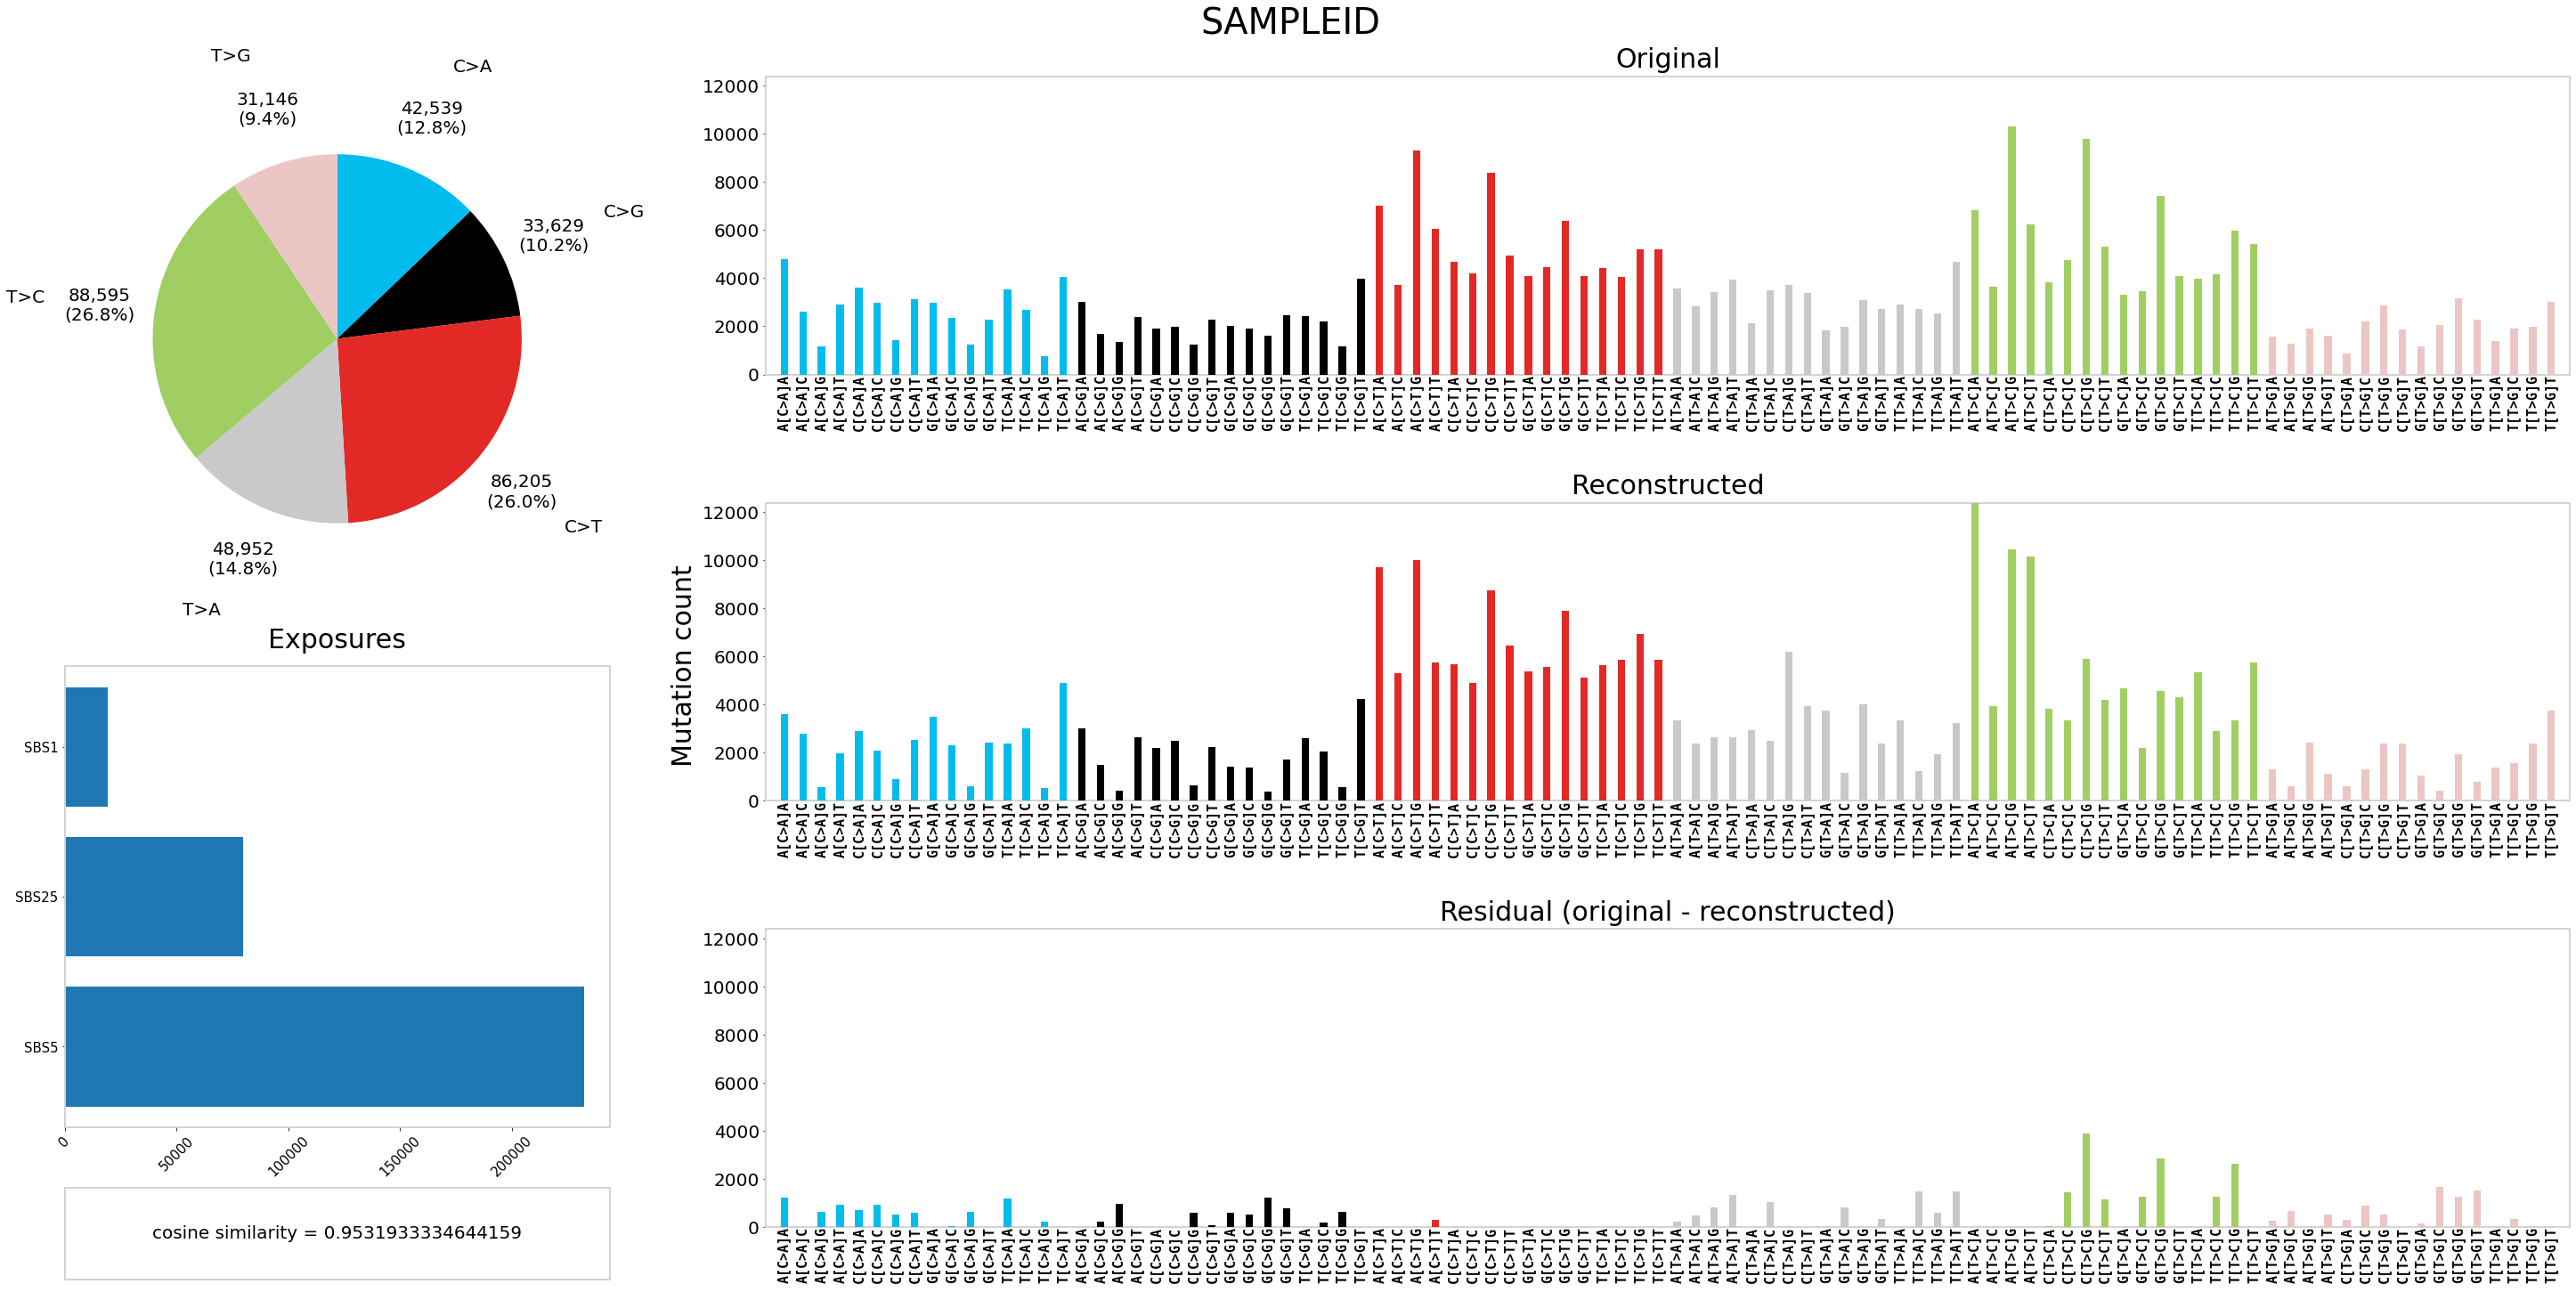

In [238]:
main(sigresult, 'SAMPLEID')

In [220]:
catalogues['sbs96'].iloc[:, 0].to_dict()

{'A[C>A]A': 4796,
 'A[C>A]C': 2618,
 'A[C>A]G': 1169,
 'A[C>A]T': 2890,
 'A[C>G]A': 3024,
 'A[C>G]C': 1697,
 'A[C>G]G': 1344,
 'A[C>G]T': 2400,
 'A[C>T]A': 7016,
 'A[C>T]C': 3724,
 'A[C>T]G': 9308,
 'A[C>T]T': 6045,
 'A[T>A]A': 3575,
 'A[T>A]C': 2820,
 'A[T>A]G': 3435,
 'A[T>A]T': 3940,
 'A[T>C]A': 6826,
 'A[T>C]C': 3659,
 'A[T>C]G': 10304,
 'A[T>C]T': 6235,
 'A[T>G]A': 1566,
 'A[T>G]C': 1261,
 'A[T>G]G': 1890,
 'A[T>G]T': 1618,
 'C[C>A]A': 3607,
 'C[C>A]C': 2997,
 'C[C>A]G': 1419,
 'C[C>A]T': 3112,
 'C[C>G]A': 1891,
 'C[C>G]C': 1976,
 'C[C>G]G': 1242,
 'C[C>G]T': 2291,
 'C[C>T]A': 4693,
 'C[C>T]C': 4204,
 'C[C>T]G': 8373,
 'C[C>T]T': 4938,
 'C[T>A]A': 2121,
 'C[T>A]C': 3489,
 'C[T>A]G': 3739,
 'C[T>A]T': 3384,
 'C[T>C]A': 3844,
 'C[T>C]C': 4773,
 'C[T>C]G': 9799,
 'C[T>C]T': 5331,
 'C[T>G]A': 879,
 'C[T>G]C': 2190,
 'C[T>G]G': 2884,
 'C[T>G]T': 1864,
 'G[C>A]A': 2999,
 'G[C>A]C': 2339,
 'G[C>A]G': 1248,
 'G[C>A]T': 2280,
 'G[C>G]A': 2016,
 'G[C>G]C': 1893,
 'G[C>G]G': 1607,
 'G[C>G]T'

In [205]:
from handygenome.signature import sigprofiler
from handygenome.variantplus import varianthandler

In [179]:
catalogue = catalogues['sbs96'].iloc[:, 0]
sigdata = sigdata_sbs


In [198]:
sigresult = sigprofiler.run_assignment(catalogue, sigdata)

In [224]:
import re
re.sub('^.*\[(.*)\].*$', '\\1',
       'A[A>C]C')

'A>C'

In [206]:
vcfspec_list = list()
for vr in pysam.VariantFile('/home/users/pjh/practice/pipeline_test/handygenome/sigprofiler/FF13.Mutect2.processed.vcf').fetch():
    vcfspec = varianthandler.get_vcfspec(vr)
    vcfspec_list.append(vcfspec)

In [213]:
sigresult = sigprofiler.get_sigresult_from_vcfspecs(vcfspec_list, 'GRCh37')

Starting matrix generation for SNVs and DINUCs...Completed! Elapsed time: 14.09 seconds.
Starting matrix generation for INDELs...Completed! Elapsed time: 6.02 seconds.
Matrices generated for 1 samples with 143 errors. Total of 331070 SNVs, 5131 DINUCs, and 32660 INDELs were successfully analyzed.


In [217]:
sigresult.cossim

0.9531933334644159

In [228]:
rownames = ['a' ,'b']
colnames = ['x', 'y']

A = pd.DataFrame(np.arange(4).reshape(2, 2), 
                 index=rownames, columns=colnames)
x = pd.Series({
    'x': 0, 
    'y': 1,
})
b = pd.Series([0, 1], index=rownames)


In [229]:
A

,x,y
a,0,1
b,2,3


In [230]:
x

x    0
y    1
dtype: int64

In [232]:
np.matmul(A, x)

a    1
b    3
dtype: int64

In [148]:
from scipy.optimize import nnls

A = np.array([[1, 0], [1, 0], [0, 1]])
b = np.array([2, 1, 1])
res = nnls(A, b)

In [158]:
a = np.arange(10).reshape(2, 5)
a[1, 2:]

array([7, 8, 9])

In [159]:
import string
print(string.ascii_uppercase)

ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [226]:
a = np.arange(10)

In [227]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [229]:
a != 0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [230]:
a.nonzero()

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),)

In [233]:
a[np.full(10, True)]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [235]:
a.all()

False

# SigProfiler test

In [6]:
import handygenome.common
import handygenome.workflow

In [7]:
vcf_path = '/home/users/team_projects/Lung_Cancer_Panel_data/03_Data_from_YTKim/09_short_variants_union/201120/LU-14_snv/LU-14.snv.mutect2_strelka2_union.mutect2_annot.vcf.gz'

In [92]:
from sigproSS import spss
import pandas as pd

def sigpro_wrapper(vcf_path, refver='GRCh37'):
    tmpdir = handygenome.workflow.get_tmpfile_path(is_dir=True, where=os.getcwd())
#     print(f'tmpdir path is: {tmpdir}')
    
    inputdir = os.path.join(tmpdir, 'input')
    os.mkdir(inputdir)
    input_vcf_path = os.path.join(inputdir, 'input.vcf')
    outputdir = os.path.join(tmpdir, 'output')
    
    # write sigpro input vcf
    with pysam.VariantFile(vcf_path, 'r') as original_vcf:
        with pysam.VariantFile(input_vcf_path, 'wu', header=original_vcf.header) as input_vcf:
            for vr in original_vcf.fetch():
                input_vcf.write(vr)

    # run SigProfilerSingleSample
    os.chdir(tmpdir)
    spss.single_sample(data=os.path.basename(inputdir), 
                       output=os.path.basename(outputdir), 
                       ref=refver, exome=False)
    os.chdir('..')
    
    # get cossim
    df_decomposition = pd.read_csv(os.path.join(outputdir, 'decomposition profile.csv'))
    cossim = float(df_decomposition.iloc[0, 2])
    
    # get mutation catalogue info
    # original counts
    sbs_dir = os.path.join(inputdir, 'output', 'SBS')
    original_counts = pd.read_csv(os.path.join(sbs_dir, 'input.SBS96.all'), sep='\t', index_col=0, header=0).iloc[:, 0]
        # a Pandas.Series object

    # reconstructed counts
    df_activity = pd.read_csv(os.path.join(outputdir, 'Sig_activities.txt'), sep='\t', index_col=0, header=0)
    dict_activity = df_activity.iloc[:, 0].to_dict()
    df_profile = pd.read_csv(os.path.join(outputdir, 'Signatures.txt'), sep='\t', index_col=0, header=0)
    reconst_counts_list = [(activity * df_profile.loc[:, sig_id])
                          for (sig_id, activity) in dict_activity.items()]
    reconst_counts = sum(reconst_counts_list)
        # a Pandas.Series object
        
    # residual counts
    resid_counts = original_counts - reconst_counts
    catalogues = pd.DataFrame(data={'original': original_counts,
                                    'reconst': reconst_counts,
                                    'resid': resid_counts})
    
    # rename dict_activity to get exposures
    def rename_sig_id(sig_id):
        return 'SBS' + sig_id.split('-')[1]    
    exposures = {rename_sig_id(sig_id): val
                 for sig_id, val in dict_activity.items()}
                
    return {'cossim': cossim, 'catalogues': catalogues, 'exposures': exposures}

In [93]:
result = sigpro_wrapper('LU-14.snv.mutect2_strelka2_union.mutect2_annot.vcf.gz')

[E::idx_find_and_load] Could not retrieve index file for 'LU-14.snv.mutect2_strelka2_union.mutect2_annot.vcf.gz'


Starting matrix generation for SNVs and DINUCs...Completed! Elapsed time: 4.71 seconds.
Starting matrix generation for INDELs...Completed! Elapsed time: 2.5 seconds.
Matrices generated for 1 samples with 294 errors. Total of 9109 SNVs, 26 DINUCs, and 0 INDELs were successfully analyzed.
##########################################################
Exacting Profile for Sample 1


SORRY! THE MUTATION CONTEXT YOU PROVIDED COULD NOT BE PLOTTED


CONGRATULATIONS! THE SIGPROFILER SINGLE SAMPLE ANALYSIS ENDED SUCCESSFULLY


In [96]:
result['catalogues']

,original,reconst,resid
A[C>A]A,172,169.894195,2.105805
A[C>A]C,88,160.126547,-72.126547
A[C>A]G,19,21.895487,-2.895487
A[C>A]T,86,138.810156,-52.810156
A[C>G]A,50,78.739981,-28.739981
...,...,...,...
T[T>C]T,221,137.934622,83.065378
T[T>G]A,40,36.084062,3.915938
T[T>G]C,38,47.552921,-9.552921
T[T>G]G,53,54.158212,-1.158212


In [1]:
import matplotlib.pyplot as plt

def plotter(cossim, catalogues, exposures):
    exposures_sum = sum(exposures.values())
    exposures_fraction = {key: val / exposures_sum 
                          for (key, val) in exposures.items()}
    
    # pieplot
    fig, ax = plt.subplots()
    ax.pie(exposures.values(), labels=exposures.keys())
    plt.show()
    

In [102]:
plotter(result['cossim'], result['catalogues'], result['exposures'])

In [103]:
fig, ax = plt.subplots()
ax.pie(result['exposures'].values(), labels=result['exposures'].keys())
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])